# Poceni Pythonska Pojedina
## Seminarska naloga


### Pridobivanje podatkov
Podatke pridobljene s pomo[ch]jo `mercator_scraper.py` in pa `okusno_scraper.py` najprej uvozimo za uporabo pri analizi. Glede enot: [ch]asi so v minutah, dol[zh]ina navodil je v [sh]tevilu znakov. Vse hranilne vrednosti in energijsko vrednost obravnavamo za 100g jedi. Le-ta je v KJ, beljakovine, ma[sh][ch]obe, ogljikovi hidrati in pa vlaknine so v gramih, ter vitamin D je mednarodnih enotah (iu).

In [132]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

recepti = pd.read_csv("data/recepti.csv")
recepti.head()

,Avtor,Cas priprave,Cas kuhanja,Skupen cas,Dolzina navodil,Energijska vrednost,Beljakovine,Ogljikovi hidrati,Mascobe,Vlaknine,Vitamin D
0,M.J.,15,40,55,1276,315.98,1.80,11.00,2.21,1.36,0.00
1,Su.S.,20,40,60,1290,1260.01,6.38,60.20,2.67,0.74,0.30
2,Sanja Sirk,15,35,50,1525,579.02,15.07,2.62,6.46,0.09,0.00
3,M. J.,10,30,40,1116,145.44,0.16,3.97,1.59,0.24,0.00
4,M. J.,20,90,110,2125,654.54,7.66,9.00,9.33,1.02,0.04


[Zh]e samo iz te tabele lahko izklu[sh]imo veliko informacij, recimo kak[sh]na je odvisnost med [ch]asom kuhanja in pa energijsko vrednostjo jedi? Kaj pa med energijsko vrednostjo ter vsebnostjo raznoraznih hranilnih snovi, npr. ali imajo kalori[ch]no bogatej[sh]e jedi ve[ch] ma[sh][ch]ob? Kaj pa ogljikovih hidratov? Za za[ch]etek si poglejmo pogostost zapletenih receptov in energijsko bogatih jedi.

Povpre[ch]na energijska vrednost je: 901.78445 KJ
Povpre[ch]na dol[zh]ina besedila je: 1208.936 znakov


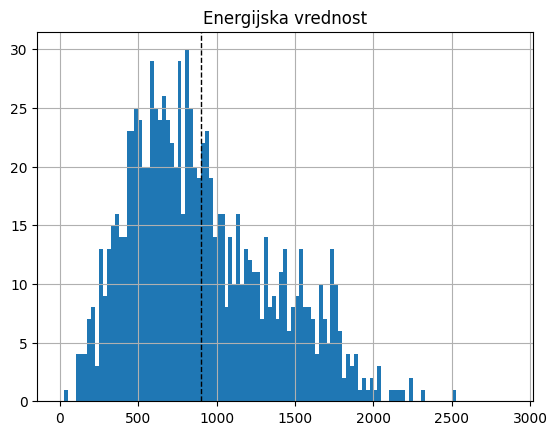

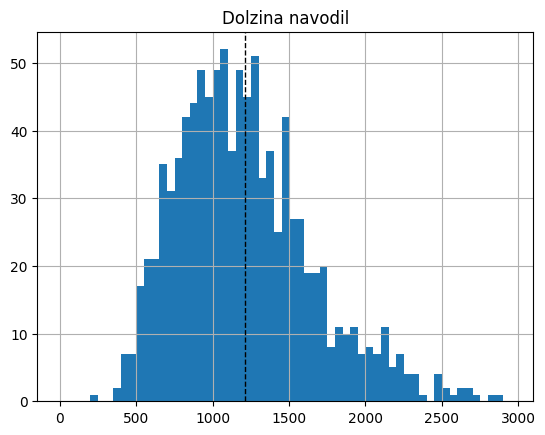

In [65]:
en_mean = recepti["Energijska vrednost"].mean()
recepti.hist("Energijska vrednost", bins = range(1,2900, 25))
plt.axvline(en_mean, color='k', linestyle='dashed', linewidth=1)
print("Povpre[ch]na energijska vrednost je: " + str(float(en_mean)) + " KJ")

dol_mean = recepti["Dolzina navodil"].mean()
recepti.hist("Dolzina navodil",bins = range(1,3000,50))
plt.axvline(dol_mean, color='k', linestyle='dashed', linewidth=1)
print("Povpre[ch]na dol[zh]ina besedila je: " + str(float(dol_mean)) + " znakov")



No pa si poglejmo [sh]e odvisnost med energijsko vrednostjo jedi in njihovimi makronutrienti.

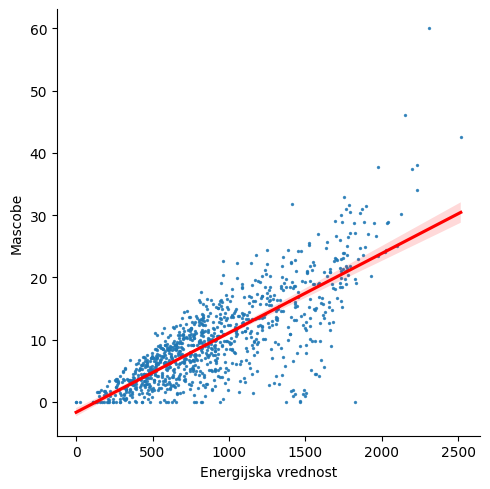

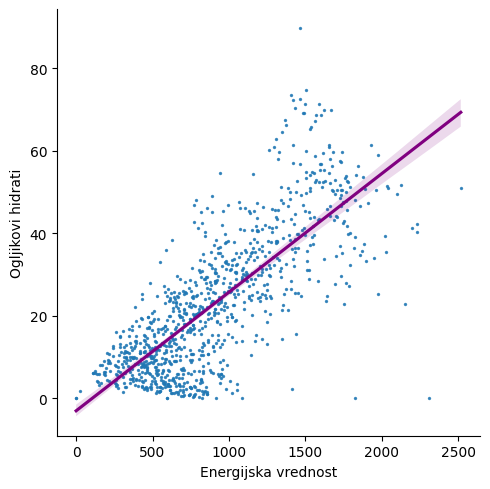

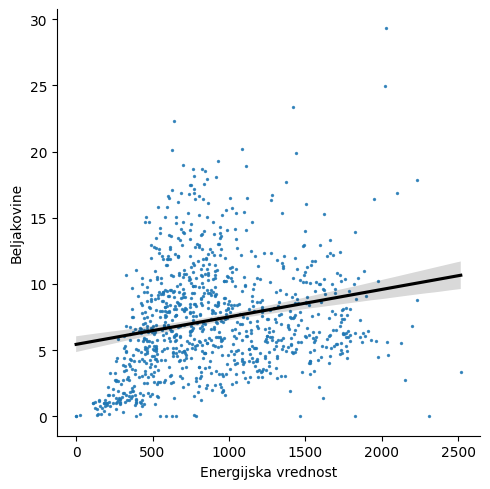

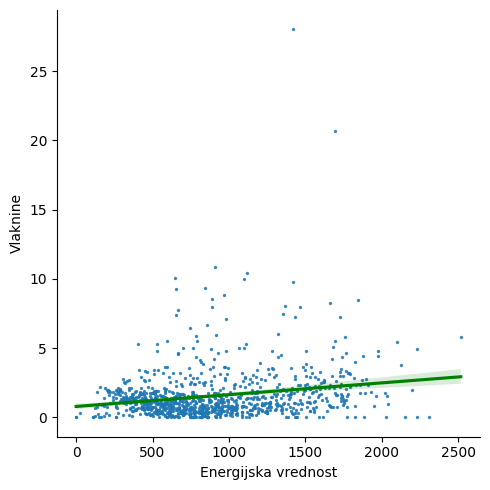

In [83]:
sns.lmplot(x="Energijska vrednost",y="Mascobe",data=recepti,fit_reg=True, line_kws={'color': 'red'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Ogljikovi hidrati",data=recepti,fit_reg=True, line_kws={'color': 'purple'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Beljakovine",data=recepti,fit_reg=True, line_kws={'color': 'black'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Vlaknine",data=recepti,fit_reg=True, line_kws={'color': 'green'},scatter_kws={"s": 2}) 

Opazimo dokaj mo[ch]no pozitivno korelacijo med energijsko vrednostjo in koli[ch]ino ma[sh][ch]ob,ogljikovih hidratov ter do neke mere vlaknin, ki so posebne v tem da jih je v vseh jedeh dokaj malo. Za beljakovine pa je graf dokaj raztresen, tako da v tem primeru linearna regresija ni najbolj uporabna metoda. 

Obrnimo na[sh]o pozornost na dol[zh]ino priprave jedi. Mar so jedi z dalj[sh]im [ch]asom priprave bolj zapletena za pripravo? Morda je [ch]as priprave ponavadi dalj[sh]i od [ch]asa kuhanja?  

Povprecje [ch]asa priprave je: 25.469 min.
Povprecje [ch]asa kuhanja je: 35.502 min.


Text(0.5, 1.0, '')

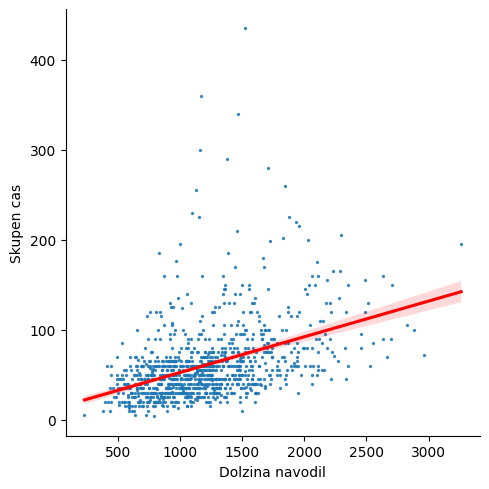

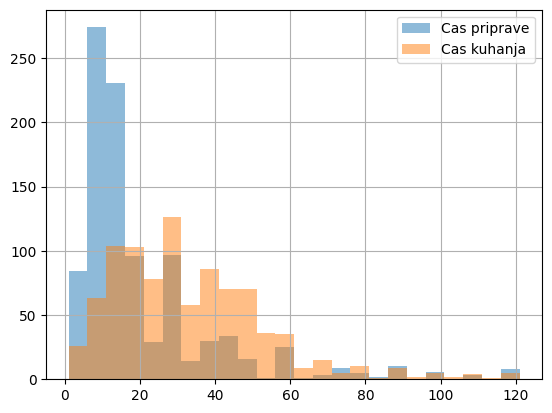

In [127]:
sns.lmplot(x="Dolzina navodil",y="Skupen cas",data=recepti,fit_reg=True, line_kws={'color': 'red'},scatter_kws={"s": 2}) 
print("Povprecje [ch]asa priprave je: " + str(float(recepti["Cas priprave"].mean())) + " min.")
print("Povprecje [ch]asa kuhanja je: " +  str(float(recepti["Cas kuhanja"].mean())) + " min.")

# truncatamo nekaj outlierjev zavoljo boljse preglednosti
recepti.hist("Cas priprave", bins=range(1,125,5), alpha=0.5, label='Cas priprave')
plt.hist(recepti["Cas kuhanja"], bins=range(1,125,5), alpha=0.5, label='Cas kuhanja')
plt.legend(loc='upper right')
plt.title("")

Opazimo pozitivno korelacijo med dolzino navodil in skupnim casom kuhanja, izgleda da bolj komplicirani recepti ponavadi vendarle zahtevajo dlje casa za izvedbo. Prav tako vidimo da ve[ch]inoma cas priprave ne presega 20 minut, cas kuhanja pa se pogosto zavlece tudi do kaksne ure, torej cas priprave ponavadi ni bottleneck pri kuhanju. Oglejmo si se statistiko piscev na okusno.je. 

In [153]:
recepti.groupby("Avtor").agg("size").sort_values(ascending=False).head(10)

Avtor
M. J.            475
Su.S.            157
M.J.             137
Sanja Sirk       100
Kristina Turk     16
Su. S.            15
T. G.             10
Tjaša Ribič       10
MasterChef         8
Bruno Šulman       8
dtype: int64

Vidimo lahko, da je razmeroma malo avtorjev odgovornih za vecino receptov na okusno.je. Ce upostevamo da sta `M.J.` in `M. J.` ter `Su.S.` in `Su. S.` ocitno isti osebi, je prvih 8 avtorjev odgovornih za 936 (od 1000) receptov! Poglejmo si vodilna `M. J.` in `Su.S.` podrobneje.

In [166]:
print("Povprecen cas peke avtorja M.J.: " + str(int(recepti[recepti["Avtor"] == "M. J."]["Skupen cas"].mean())) + " min")
print("Povprecen cas peke avtorja Su.S.: " + str(int(recepti[recepti["Avtor"] == "Su.S."]["Skupen cas"].mean())) + " min")
print("Povprecen kaloricna vrednost avtorja M.J.: " + str(int(recepti[recepti["Avtor"] == "M. J."]["Energijska vrednost"].mean())) + " KJ")
print("Povprecen kaloricna vrednost avtorja Su.S.: " + str(int(recepti[recepti["Avtor"] == "Su.S."]["Energijska vrednost"].mean())) + " KJ")
print("Povprecna kolicina proteinov avtorja M.J.: " + str(int(recepti[recepti["Avtor"] == "M. J."]["Beljakovine"].mean())) + " g")
print("Povprecna kolicina proteinov avtorja Su.S.: " + str(int(recepti[recepti["Avtor"] == "Su.S."]["Beljakovine"].mean())) + " g")
print("Povprecna kolicina mascob avtorja M.J.: " + str(int(recepti[recepti["Avtor"] == "M. J."]["Mascobe"].mean())) + " g")
print("Povprecna kolicina mascob avtorja Su.S.: " + str(int(recepti[recepti["Avtor"] == "Su.S."]["Mascobe"].mean())) + " g")

Povprecen cas peke avtorja M.J.: 57 min
Povprecen cas peke avtorja Su.S: 56 min
Povprecen kaloricna vrednost avtorja M.J.: 889 KJ
Povprecen kaloricna vrednost avtorja Su.S: 972 KJ
Povprecna kolicina proteinov avtorja M.J.: 7 g
Povprecna kolicina proteinov avtorja Su.S: 7 g
Povprecna kolicina mascob avtorja M.J.: 9 g
Povprecna kolicina mascob avtorja Su.S: 10 g
Povprecen cas peke avtorja M.J.: 21 min
Povprecen cas peke avtorja Su.S: 24 min


Zgleda da sta si najbolj prolifericna avtorja kar jih okusno.je premore med sabo dokaj podobna. Cas peke, kolicina mascob/beljakovin sta skoraj ce ne identicni, so pa `Su.S.` jedi rahlo energijsko bogatejse.

## Mercator analiza

Oglejmo si se nekaj dejstev o izdelkih, ki jih ponuja Mercatorjeva spletna trgovina. 

In [208]:
izdelki = pd.read_csv("data/izdelki.csv")
izdelki.drop(columns="Promocijska cena").describe()

,Cena,Kolicina
count,15379.000000,15379.000000
mean,6.836622,34.503386
std,19.248111,211.534196
min,0.090000,0.001000
25%,1.990000,1.000000
50%,3.490000,1.000000
75%,6.290000,1.000000
max,1099.990000,10000.000000


Vidimo, da je povprecna cena v mercatorju 6.8 EUR (po redni ceni). Promocijske cene si bomo ogledali pozneje, saj v primeru ko ni promocije je vrednost v tabeli `0.0`, kar bi tu kvarilo povprecje. Recimo, da nas zanima katera znamka je najugodnejsa:

In [214]:
izdelki.groupby("Znamka").agg("Cena").mean().sort_values()

Znamka
PRIME                  0.300000
ZOTT KAFFEE GOLD       0.390000
BANANKO                0.390000
FALLINI                0.430000
PANACHE                0.490000
                        ...    
BLIST VALJEVO        219.990000
MAMIBOT              259.990000
ROWENTA              293.323333
ASUS                 379.990000
AVENLI               446.596000
Name: Cena, Length: 1877, dtype: float64

Najcenejsi sta torej znamki `Prime` ter  `Zott Kaffe Gold`, najdrazji pa `Asus` in `Avenli`, prodajalca racunalnikov in pa bazenov. Nas seveda najbolj zanimajo prodajalci hrane, da bomo lahko izvedli povezavo z okusno.je ;).